# <span style="color:teal;">CIS 211 Project 4:  Orbits</span>

##### Due 11:00 P.M. April 28, 2017

##### Reading:  M&R 10.6.3

###  <span style="color:teal">Vector and Body Classes</span>

This week's project will build on the Vector and Body classes from last week in order to create a complete simulation of the Solar System.  There are two ways to define these classes:  (1) copy your definitions from last week's project, or (2) download the instructor's solution from Canvas.

Instructions for both methods are in the next two sections.  **Use either of these methods, but not both.**  

Note: you will earn **extra credit points** if you use your own code.

####  <span style="color:teal">Option 1: &nbsp; Use Your Own Classes</span>

Choose this method only if your classes passed all the unit tests. Copy the complete Vector and Body class definitions from last week's notebook and paste them into the code cells below.  

In [21]:
from math import sqrt

class Vector:
    """
    A Vector object represents a 3 dimensional geometric object that has length and direction in space.
    It is represented as the coordninates (x,y,z) which correspond to its location.
    """
    
    def __init__(self,x,y,z):
        self._x = x
        self._y = y
        self._z = z
        
    def __repr__(self):
        return "({:.3g},{:.3g},{:.3g})".format(self._x,self._y,self._z)
    
    def x(self):
        return self._x
    
    def y(self):
        return self._y
    
    def z(self):
        return self._z
    
    def norm(self):
        """
        Computes the magnitude of a vector.

       :param Vector self: A given Vector of coordinates.
       :return: the magnitude of a given vector.
       :rtype: float
        """
        return (sqrt((self._x**2)+(self._y**2)+(self._z**2)))
    
    def __add__(self, other):
        return Vector(self._x + other._x, self._y + other._y, self._z + other._z)
    
    def __sub__(self, other):
        return Vector(self._x - other._x, self._y - other._y, self._z - other._z)
    
    def __mul__(self,other):
        return Vector(self._x * other, self._y * other, self._z * other)

    def __eq__(self,other):
        return Vector((round(self._x-other._x,3) == 0), (round(self._y-other._y,3) == 0) ,round(self._z-other._z,3) == 0)
    
    def __ne__(self,other):
        return Vector((round(self._x-other._x,3) != 0), (round(self._y-other._y,3) != 0) ,round(self._z-other._z,3) != 0)
    
    def clear(self):
        """
        Clears the value of a Vector to all 0's.

       :param Vector self: A given Vector of coordinates.
       :return: a Vector of values with coordinates (0,0,0).
       :rtype: Vector
        
        """
        self._x = 0
        self._y = 0
        self._z = 0

In [22]:
G = 6.67E-11

class Body:
    """
    A Body object represents the state of a celestial body.  A body has mass 
    (a scalar), position (a vector), and velocity (a vector).  A third vector, 
    named force, is used when calculating forces acting on a body.
    """
    def __init__(self, mass=0,position=Vector(0,0,0), velocity=Vector(0,0,0), force=Vector(0,0,0)):
        self._mass = mass
        self._position = position
        self._velocity = velocity
        self._force = force
        
    def __repr__(self):
        return "{:.3g}kg {} {}".format(self._mass,self._position,self._velocity)
    
    def mass(self):
        return self._mass
    
    def position(self):
        return self._position
    
    def velocity(self): 
        return self._velocity
    
    def force(self):
        return self._force
    
    def direction(self, other):
        """
        a method which takes another Body object 
        as a parameter and returns a vector that "points at" the other Body.

       :param Body self: A Body object.
       :param Body other: Another Body object.
       :return: a body object with an updated position vector that "points at" the other Body.
       :rtype: Body
        """
        return self._position-other._position
    
    def clear_force(self):
        """
        a method that sets the force vector to (0,0,0) by calling that vector's clear method

       :param Body self: A Body object.
       :return:A body object with the the force updated with the  force vector
       of a Body object to  being reset to (0,0,0).
       :rtype: Body
        
        """
        return self._force.clear()
            
    def add_force(self,other):
        """
        a method that computes a force of an object pulling on the force of another object.

       :param Body self: A Body object.
       :param Body other: Another Body object.
       :return: A body object with the the force updated with the force its is being pulled on by another object.
       :rtype: Body
        
        """
        self._force = self._force - ((self.direction(other)) * ((other._mass) / (self.direction(other).norm()**3)))
        return self._force
    
    def move(self,dt):
        """
        a method that uses the current value of the force vector to update the object's position
        with the objects acceleration

       :param Body self: A Body object.
       :param number dt: a time step size 
       :return: Body object with an updated position vector .
       :rtype: Body
        
        """
        A= self._force * G
        self._velocity = self._velocity+A*dt
        self._position = self._position + self._velocity*dt

####  <span style="color:teal">Option 2: &nbsp; Download the Instructor's Solution from Canvas </span>

If your classes did not pass all the unit tests you need to download a  "compiled Python" (`.pyc`) file from the Files section on Canvas.

The file you need has a name that ends with `cpython-3x.pyc` where `x` is either 4 (for Python 3.4), 5 (for Python 3.5), or 6 (for Python 3.6). To see which version of Python you have, select About from Jupyter's Help menu.
It does not matter which OS you have, the `.pyc` files work for Mac, Windows, or Linux

Download one of the `Body.cpython-3x.pyc` files, rename it `Body.pyc`, and move it to the same folder as this notebook.  Then uncomment and execute the `import` command in the code cell below.

In [23]:
# from Body import *

###  <span style="color:teal">Libraries</span>

Execute the following code cell each time you open this notebook.

In [24]:
from copy import deepcopy
import matplotlib.pyplot as plt

%matplotlib inline

###  <span style="color:teal">Part 1: Planet Class (20 Points)</span>

Use the code cell below to define a new class named Planet.  Define the class so that a Planet is a kind of Body, _i.e._ the Planet class is a descendant of the Body class.

The Planet class should extend the Body class by adding two new attributes:
* the name of the planet
* the color that will be used when the planet is displayed in the GUI

Both the name and the color are strings that can be passed to the constructor when the object is created, along with any of the attributes that can be used to initialize a Body object.  For example:
```
>>> p = Planet(mass=5.9736E+24, name='earth', color='blue')
```
If no name or color is specified initialize those attributes to empty strings.

**Hint:** &nbsp; The examples in the lecture notes for Apr 24--28 show how to add named arguments to the constructor for a derived class.

The Planet class should also include two new "getter" methods that return the name and color of a planet.  Using the object created in the example above:
```
>>> p.name()
'earth'

>>> p.color()
'blue'
```

**Style Points:** &nbsp;  The main goal for writing a derived class is to reuse as much of the parent class as possible.  We'll deduct points for statements included in the Planet class that duplicate operations already implemeneted in the Body class.

##### <span style="color:red">Code:</span>

In [25]:
class Planet(Body):
    """
    A Planet object represents the state of a celestial body.  A body has mass 
    (a scalar), position (a vector), and velocity (a vector).  A third vector, 
    named force, is used when calculating forces acting on a body.
    """
    def __init__(self,mass=0,position=Vector(0,0,0), velocity=Vector(0,0,0), force=Vector(0,0,0), color="", name = ""):
        super().__init__(mass,position, velocity, force)
        self._color= color
        self._name= name
        
    def name(self):
        return self._name
    
    def color(self):
        return self._color

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

##### <span style="color:red">Autograder Tests:</span>

In [26]:
# Test 1:  Call the constructor with default values.
p0 = Planet()
assert p0.name() == ''
assert p0.color() == ''
assert p0.mass() == 0.0

In [27]:
# Test 2:  Make an object that will represent Earth in the simulation
earth_loc = Vector(-2.700743E+10,1.446007E+11,9686451)
earth_dir = Vector(-29770.44,-5568.042,0.3961261)

earth = Planet(mass=5.9736E+24, position=earth_loc, velocity=earth_dir, name='earth', color='blue')
assert 5.973E+24 < earth.mass() < 5.974E+24
assert earth.name() == 'earth'
assert earth.color() == 'blue'

In [28]:
# Test 3: Verify the Planet class inherits force calculations
sun = Body(1.9891E+30, Vector(0,0,0), Vector(0,0,0))
earth = Planet(5.9736E+24, Vector(-2.700743E+10,1.446007E+11,9686451), Vector(-29770.44,-5568.042,0.3961261))

assert earth.force() == Vector(0,0,0)

earth.add_force(sun)
earth.move(86400)

assert -2.97e+10 < earth.position().x() < -2.95e+10
assert 1.43e+11 < earth.position().y() < 1.45e+11

##### <span style="color:red">Documentation:</span>

The process in creating this class involved:

1.defining the planet class as a child class inherting from the Body class.

2.defining two attributes that are unique to the planet class which are the name and color attributes.


###  <span style="color:teal">Part 2: &nbsp; Solar System Simulation (30 points)</span>

Execute this code cell to create a list of objects for the sun and the 9 planets.  The positions and initial velocities are from a "snapshot" of the solar system from January 1, 1970.

**Do not change this cell.** &nbsp; The autograder will use these objects to test your simulation.

In [29]:
solar_system = [
    Body(1.9891E+30,    Vector(0,0,0), Vector(0,0,0)),
    Planet(3.302E+23,   Vector(3.83713E+10,2.877025E+10,-1.175808E+09),    Vector(-38787.67,41093.05,6918.461),    name='mercury',  color='#ffcc66'),
    Planet(4.8685E+24,  Vector(-5.377313E+09,-1.085956E+11,-1.164748E+09), Vector(34741.48,-1865.747,-2031.506),   name='venus',    color='#800080'),
    Planet(5.9736E+24,  Vector(-2.700743E+10,1.446007E+11,9686451),        Vector(-29770.44,-5568.042,0.3961261),  name='earth',    color='#0000ff'),
    Planet(6.4185E+23,  Vector(1.983825E+11,7.422924E+10,-3.334841E+09),   Vector(-7557.626,24761.27,704.7457),    name='mars',     color='#ff0000'),
    Planet(1.89813E+27, Vector(-7.496502E+11,-3.201711E+11,1.811155E+10),  Vector(4982.522,-11417.83,-64.66531),   name='jupiter',  color='#ffffbf'),
    Planet(5.68319E+26, Vector(1.082806E+12,8.510841E+11,-5.793461E+10),   Vector(-6487.118,7565.952,125.4422),    name='saturn',   color='#0080ff'),
    Planet(8.68103E+25, Vector(-2.724616E+12,-2.894003E+11,3.428801E+10),  Vector(671.3469,-7099.093,-35.04028),   name='uranus',   color='#008080'),
    Planet(1.0241E+26,  Vector(-2.328072E+12,-3.891086E+12,1.337436E+11),  Vector(4633.961,-2767.423,-49.57268),   name='neptune',  color='#004080'),
    Planet(1.314E+22,   Vector(-4.551135E+12,3.175277E+11,1.282177E+12),   Vector(635.998,-5762.115,440.8821),     name='pluto',    color='#dddddd')
]

To run the full N-body simulation we need to calculate all pairwise interactions between the bodies.  On each time step, first update each body's force vector:
```
for i = 0 to n-1:
  for j = 0 to n-1:
    if i != j:
      add the force of body j to body i's force vector
```
Now uses the accumulated forces to move each body and clear the force vector so it's ready for the next time step:
```
for i = 0 to n-1:
   move body i
   clear forces on body i
```

Fill in the body of the function named `step_system`.  The arguments to this function are
* a list of Body objects (and since Planets are derived from Body the list can include them, too)
* a time step size (default 86459, the number of seconds in 1/365 of a year)
* the number of time steps to simulate (default 1)

The return value should be a list of orbits.  If there are $n$ bodies passed to the function, the output will be a list of $n$ sequences containing the $(x,y)$ coordinates of each body at each time step.

For example, to simulate one year of the solar system, using the list of Body object defined above:
```
orbits = step_system(solar_system, nsteps=365)
```
The output will be a list of 10 lists:
```
[ 
  [(sx0,sy0), (sx1,sy1), (sx2,sy2), ...],
  [(mx0,my0), (mx1,my1), (mx2,my2), ...],
  ...
  [(px0,py0), (px1,py1), (px2,py2), ...]
]
```
where `sx` and `sy` are the $x$ and $y$ coordinates of the first body (the Sun), `mx` and `my` are the coordinates of the second body (Mercury), _etc_.

**Note** &nbsp; Each time you call your `step_system` function it's going to change the position vectors in the Body objects.  To make sure you have a "clean copy" each time you test your code either go back and re-execute the cell that defines the solar system or make a copy of the solar system to use in your test:
```
ss = deepcopy(solar_system)
```

In [30]:
def step_system(bodies, dt=86459, nsteps=1):
    """
    Draws a set of concentric circles.  

    :param body bodies: a list of body and planet items
    :param number dt:size of the time step
    :param number nsteps: number of times to simulate
    :return: returns the x,y coordinates of the location at each time step for each planet
    :rtype: List
        
    """
    n = len(bodies)
    orbits = [[] for p in range(n)]
    counter=0
    
    for l in range (nsteps):
        for i in range(n-1):
            for j in range (n-1):
                if i != j:
                    bodies[i].add_force(bodies[j])
                    
        for i in range(0,n-1):
            bodies[i].move(dt)
            bodies[i].clear_force()
            
        for body in bodies:
            x=body.position().x()
            y=body.position().y()
            z=(x,y)
            orbits[counter].append(z)
            counter +=1
        counter=0
                
    return orbits


##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

##### <span style="color:red">Autograder Tests:</span>

Test 1:  Run the simulation for 5 time steps.  The return value should be a list of 10 orbits, and each orbit should have 5 pairs.

In [31]:
ss = deepcopy(solar_system)
orbits = step_system(ss, nsteps=5, dt=86400)

assert isinstance(orbits,list)
assert len(orbits) == 10
assert sum([len(x) for x in orbits]) == 50

Test 2:  Run the simulation long enough for Mercury to make one full orbit (about 88 Earth days), see if it's close to where it started.

In [32]:
ss = deepcopy(solar_system)
start = deepcopy(ss[1].position())            # Mercury's starting position
step_system(ss, nsteps=1000, dt=7600.5216)
stop = ss[1].position()                       # Mercury's final position

assert (stop-start).norm() < 1e10

##### <span style="color:red">Documentation:</span>

The process in creating this function involved:

1.creating a variable i which is the first item in the body and creating j which is the second item in the body and comparing the two. 

2.if the two are not equal then adding the force of j to the force of i and doing this for all bodys in the list>

3.doing this process n-1 times or the length of a given list of bodies and planets subtracted by 1.

4.taking the bodies that have been updated with new forces and moving the bodies by dt and clearing the force.

5.adding each Body or Planet to its own seperate list contained in the list orbit, and recording each coordinate change to the respective planets list.

###  <span style="color:teal">Part 3: &nbsp; Draw Concentric Circles (20 points)</span>

This part of the project is a "warmup exercise" to help you learn how to use PyPlot to draw orbits.

Fill in the body of the function definition below so it draws a set of concentric circles.  Each circle will actually be a sequence of connected line segments drawn by a call to the `plot` function.  The parameters are:
* the number of circles to draw
* the radius of the innermost circle
* the radius of the outermost circle
* the number of line segments in each circle

Use the radius of the inner and outer circles to compute equally spaces between the other circles.  For example, if the call is
```
>>> concentric(ncircles=5, inner=5, outer=9)
```
the function should draw circles with radius 5, 6, 7, 8, and 9.

####  <span style="color:teal">Hint </span>

For a circle with radius $r$ the $(x,y)$ coordinates of the point at  angle $\alpha$ are $x = r \cos \alpha$ and $y = r \sin \alpha$.

![circle](http://pages.uoregon.edu/conery/CIS211/Orbits/circle.png)

The following expressions will create lists of $x$ and $y$ coordinates for $n$ equally spaced points around the perimeter of a circle with radius 1.  When $n =6$ there will be 6 line segments, _i.e._ the "circle" will actually be a hexagon.

In [33]:
from math import pi as π, sin, cos

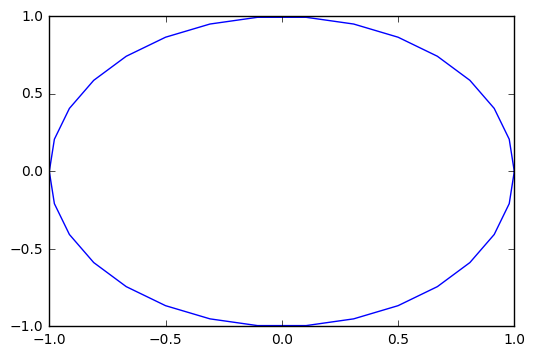

In [34]:
n = 30
x = [ cos(2*π*i/n) for i in range(n+1) ]
y = [ sin(2*π*i/n) for i in range(n+1) ]

plt.plot(x,y)

**Note:** &nbsp; These lists have $n+1$ values so the last line segment "completes the circle" and connects back to the starting point.

To complete this project you need to do two things:
* adapt the expressions shown above to make circles with the correct radius
* figure out how to pass the list of $x$ and $y$ coordinates to `plot` so it draws the circles

##### <span style="color:red">Code:</span>

In [35]:
def concentric(ncircles=3, inner=1, outer=2, nsegs=30):
    """
    Draws a set of concentric circles.  

    :param number ncircles: desired number of circles
    :param number inner: size of innermost circle
    :param number outer: size of outermost circle
    :param number nsegs: desired number of line segments used to draw the circle
    
    :return: prints cocentrics circles based on given parameters using the plot function.
    :rtype: None
        
    """
    n = inner
    circle_space = (outer-inner)/(ncircles-1)
    for i in range(0, ncircles):
        x = [ cos(2*π*i/nsegs)*n for i in range(nsegs+1)]
        y = [ sin(2*π*i/nsegs)*n for i in range(nsegs+1)]
        n=n+circle_space
        plt.axes().set_aspect('equal')
        plt.plot(x,y)
    return None

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

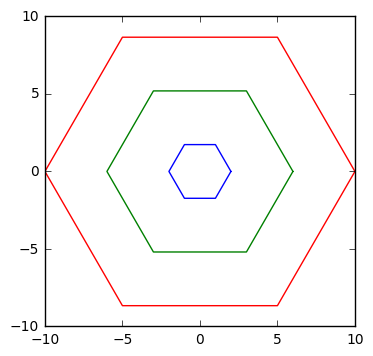

In [36]:
concentric(ncircles=3, inner=2, outer=10, nsegs=6)

##### <span style="color:red">Autograder Tests:</span>

The autograder cells use a different strategy for this part of the project.  The autograder will just make sure your function does not crash.  The human grader will look at the drawing to assign points for correctness.

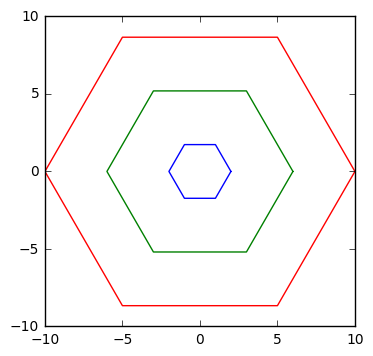

In [37]:
concentric(ncircles=3, inner=2, outer=10, nsegs=6)

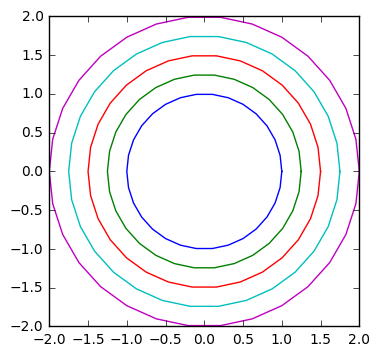

In [38]:
concentric(ncircles=5)

##### <span style="color:red">Documentation:</span>

The process in creating this function involved:

1.establishing the location of the innermost circle.

2.figuring out the spacing between circles by taking the size of the outermost, subtracting by the innermost and diving by the desired number of circles.

3.then using the sin and cos functions, created coordinates to map the circles and multiplying by n which gets updates each loop through to reflect the new, arger circle.

###  <span style="color:teal">Part 4: &nbsp; Plotting Orbits (30 points)</span>

Complete the definition of the `plot_orbits` function below.  The first four lines will run the simulation, using your `step_system` function, and figure out how many orbits to draw.  You need to fill in the rest:  extract the $x$ and $y$ coordinates from the list returned by `step_system` and plot the orbits.

**Note:** &nbsp; The simulation will use all 10 bodies in the solar system, but the number of orbits to show will be determined by the value passed as `nplanets`.

When you draw the orbits, you can pick one color and use it for all orbits, or let the library choose which colors to use.

For **extra credit** get each planet's color by calling the `color` method and pass that color string to the `plot` function when drawing the planet's orbit.  The Sun is a Body object and it does not have a color attribute so just use black for this orbit.

##### <span style="color:red">Code:</span>

In [43]:
def plot_orbits(bodies, ndays = 365, nplanets=None):
    """
    Uses the step_system function and plots the orbits of planets.  

    :param list bodies: a list of body instances.
    :param number ndays: desired days of planets orbitting.
    :param number/None nplanets: Number of desired planets to be shown, if None is given then shows all planets.
    
    :return: graphs orbits of planets using plot function.
    :rtype: None
        
    """
    x_coordinates=[]
    y_coordinates=[]
    plt.axes().set_aspect('equal')
    bodies = deepcopy(bodies)
    orbits = step_system(bodies, nsteps=ndays)
    
    if nplanets is None:
        nplanets = len(bodies)
        
    for i in range(nplanets):
        x_coordinates.append([orbits[i][r][0]for r in range(ndays)])
        y_coordinates.append([orbits[i][s][1]for s in range(ndays)])
    for i in range(nplanets):
        plt.plot(x_coordinates[i],y_coordinates[i])
        

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

##### <span style="color:red">Autograder Tests:</span>

The autograder will call your `plot_orbits` function, the human grader will assign points based on the plot.

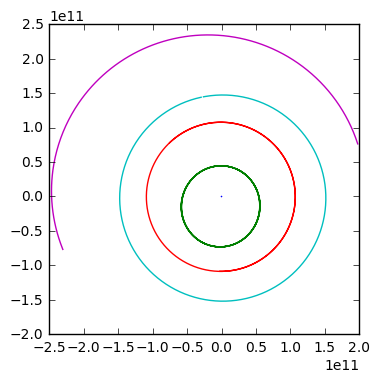

In [42]:
plot_orbits(solar_system, nplanets=5)

##### <span style="color:red">Documentation:</span>

**Important** &nbsp; If you plot orbits using each planet's own color attribute include "Extra Credit" in your documentation and explain how you did it.

The process in creating this function involved:

1.iterated through the main list of planets and used set comprehension to make seperate list of x and y values.

2.plotted these values using plot function.